# SRMP

This notebook is dedicated to the use of the SRMP algorithm.

In [1]:
%matplotlib notebook
%config Completer.use_jedi = False

## Init

In [2]:
from pandas import DataFrame
from mcda.core.scales import *
import mcda.outranking.srmp as srmp
from mcda.plot.plot import plot_outranking

In [3]:
#Parameters 
alternatives = ["Fiat 500", "Peugeot 309", "Renault Clio", "Opel Astra", "Honda Civic", "Toyota Corolla"]
criteria = ["cost", "fuel consumption", "comfort", "color", "range"]
scale1 = QuantitativeScale(6000, 20000, PreferenceDirection.MIN)
scale2 = QuantitativeScale(4, 6, PreferenceDirection.MIN)
scale3 = QualitativeScale(["*", "**", "***", "****"], [1, 2, 3, 4])
scale4 = QualitativeScale(["red", "blue", "black", "grey"], [1, 2, 3, 4], PreferenceDirection.MIN)
scale5 = QuantitativeScale(400, 1000)
scales = {
    criteria[0]: scale1,
    criteria[1]: scale2,
    criteria[2]: scale3,
    criteria[3]: scale4,
    criteria[4]: scale5
}
performance_table = DataFrame(
    [
        [9500, 4.2, "**", "blue", 450],
        [15600, 4.5, "****", "black", 900],
        [6800, 4.1, "***", "grey", 700],
        [10200, 5.6, "****", "black", 850],
        [8100, 5.2, "***", "red", 750],
        [12000, 4.9, "****", "grey", 850]
    ],
    index=alternatives,
    columns=criteria
)

criteria_weights = {
    criteria[0]: 1,
    criteria[1]: 2,
    criteria[2]: 3,
    criteria[3]: 2,
    criteria[4]: 4
}

profiles = DataFrame(
    [
        [15000, 5.5, "**", "grey", 500],
        [10000, 5, "***", "black", 700],
        [7000, 4.5, "****", "blue", 900],
    ],
    columns=criteria
)

lexicographic_order = [2, 0, 1]

## Preference relations

In [4]:
preference_matrix_0 = srmp.preference_relation(
    profiles.loc[0],
    performance_table,
    scales,
    criteria_weights,
)
preference_matrix_0

Fiat 500  Peugeot 309  Renault Clio  Opel Astra  Honda Civic  \
Fiat 500               1            0             0           0            0   
Peugeot 309            1            1             0           1            0   
Renault Clio           1            1             1           1            1   
Opel Astra             1            0             0           1            0   
Honda Civic            1            1             1           1            1   
Toyota Corolla         1            1             1           1            1   

                Toyota Corolla  
Fiat 500                     0  
Peugeot 309                  0  
Renault Clio                 1  
Opel Astra                   0  
Honda Civic                  1  
Toyota Corolla               1

In [5]:
preference_matrix_1 = srmp.preference_relation(
    profiles.loc[1],
    performance_table,
    scales,
    criteria_weights,
)
preference_matrix_1

Fiat 500  Peugeot 309  Renault Clio  Opel Astra  Honda Civic  \
Fiat 500               1            0             0           0            0   
Peugeot 309            1            1             1           1            1   
Renault Clio           1            0             1           1            1   
Opel Astra             1            0             0           1            0   
Honda Civic            1            0             1           1            1   
Toyota Corolla         1            0             0           1            0   

                Toyota Corolla  
Fiat 500                     0  
Peugeot 309                  1  
Renault Clio                 1  
Opel Astra                   1  
Honda Civic                  1  
Toyota Corolla               1

In [6]:
preference_matrix_2 = srmp.preference_relation(
    profiles.loc[2],
    performance_table,
    scales,
    criteria_weights,
)
preference_matrix_2

Fiat 500  Peugeot 309  Renault Clio  Opel Astra  Honda Civic  \
Fiat 500               1            0             1           1            1   
Peugeot 309            1            1             1           1            1   
Renault Clio           0            0             1           1            1   
Opel Astra             0            0             1           1            1   
Honda Civic            0            0             0           0            1   
Toyota Corolla         0            0             1           1            1   

                Toyota Corolla  
Fiat 500                     1  
Peugeot 309                  1  
Renault Clio                 1  
Opel Astra                   1  
Honda Civic                  0  
Toyota Corolla               1

## Ranking

In [7]:
rank = srmp.ranking(
    [preference_matrix_0, preference_matrix_1, preference_matrix_2],
    lexicographic_order,
)
rank

Fiat 500          5
Peugeot 309       6
Renault Clio      4
Opel Astra        2
Honda Civic       1
Toyota Corolla    3
dtype: int64

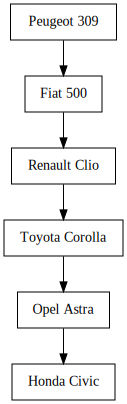

In [8]:
from mcda.plot import plot_linear_ranking
plot_linear_ranking(rank)

## Direct method

In [9]:
rank = srmp.srmp(performance_table, scales, criteria_weights, profiles, lexicographic_order)
rank

Fiat 500          5
Peugeot 309       6
Renault Clio      4
Opel Astra        2
Honda Civic       1
Toyota Corolla    3
dtype: int64

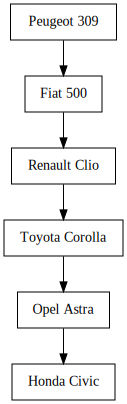

In [10]:
from mcda.plot import plot_linear_ranking
plot_linear_ranking(rank)

## Plot

### Input data

<IPython.core.display.Javascript object>


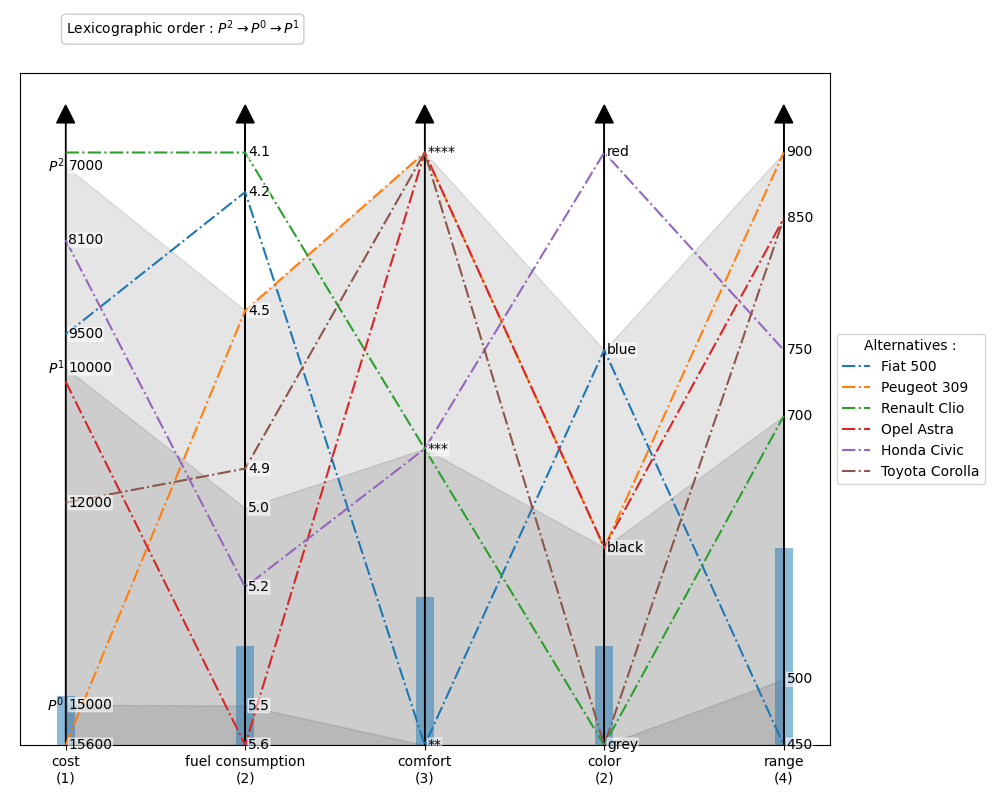

In [11]:
srmp.plot_input_data(
    performance_table,
    scales,
    criteria_weights=criteria_weights,
    profiles=profiles,
    lexicographic_order=lexicographic_order,
    xticklabels_tilted=False,
    annotations=True,
    scales_boundaries=False, # better readibility
    annotations_alpha=0.5,
    figsize=(10, 8),
)

#### Comparison between alternatives

<IPython.core.display.Javascript object>


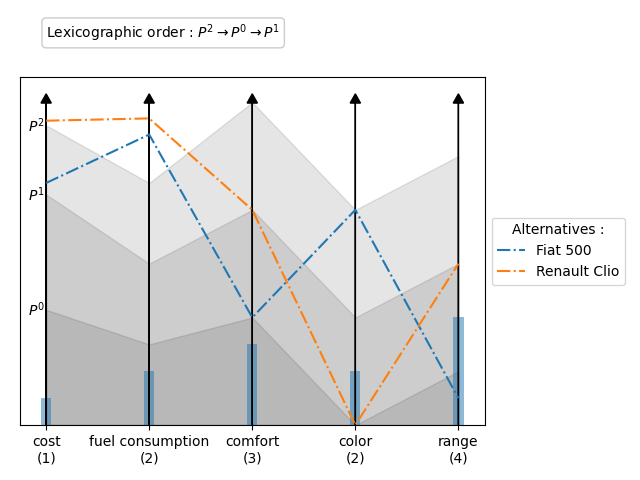

In [12]:
srmp.plot_input_data(
    performance_table.loc[["Fiat 500", "Renault Clio"]],
    scales,
    criteria_weights=criteria_weights,
    profiles=profiles,
    lexicographic_order=lexicographic_order,
    xticklabels_tilted=False,
    annotations=False,
    scales_boundaries=True, # to keep the same boundaries between the comparisons
)

<IPython.core.display.Javascript object>


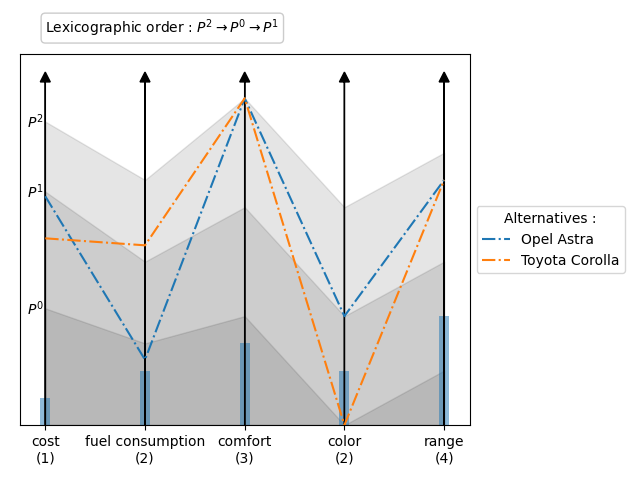

In [13]:
srmp.plot_input_data(
    performance_table.loc[["Opel Astra", "Toyota Corolla"]],
    scales,
    criteria_weights=criteria_weights,
    profiles=profiles,
    lexicographic_order=lexicographic_order,
    xticklabels_tilted=False,
    annotations=False,
    scales_boundaries=True,
)

### Concordance

<IPython.core.display.Javascript object>


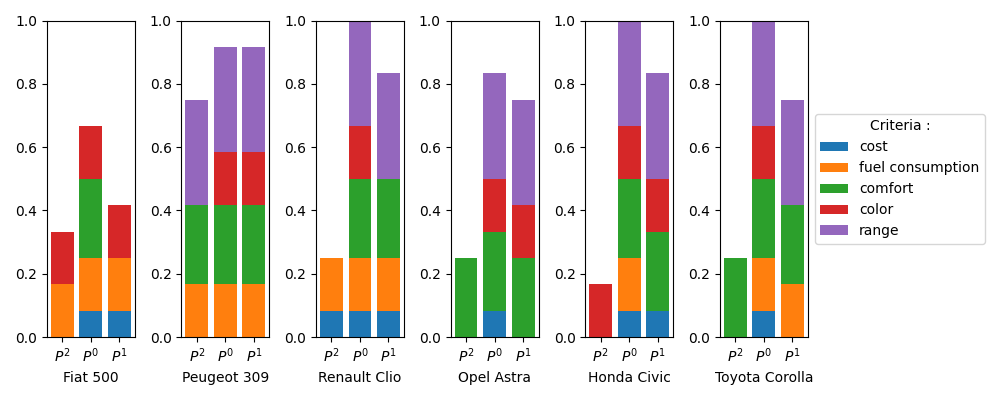

In [14]:
srmp.plot_concordance_index(
    performance_table,
    scales,
    criteria_weights,
    profiles,
    lexicographic_order,
    figsize=(10, 4),
    nrows=1,
    xlabels_tilted=False,
)

### Progressive ranking

<IPython.core.display.Javascript object>


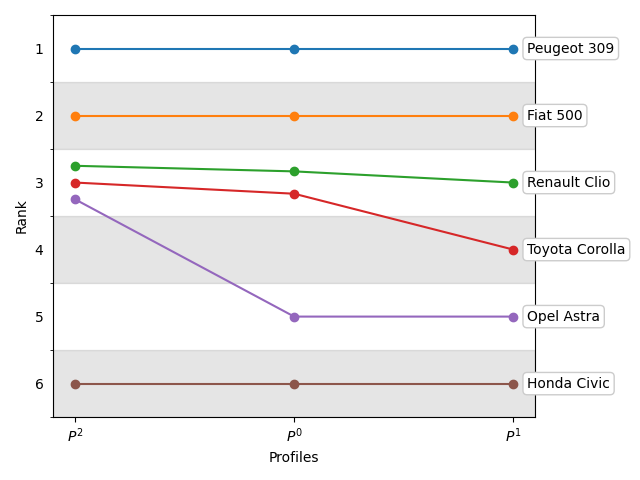

In [15]:
srmp.plot_progressive_ranking(
    performance_table,
    scales,
    criteria_weights,
    profiles,
    lexicographic_order,
)

## Preference elicitation

### Providing relations

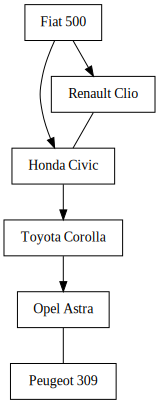

In [16]:
from mcda.core.relations import RelationType
from mcda.plot import plot_relation

relations = [
    ("Fiat 500", "Honda Civic", RelationType.PREFERENCE),
    ("Toyota Corolla", "Opel Astra", RelationType.PREFERENCE),
    ("Fiat 500", "Renault Clio", RelationType.PREFERENCE),
    ("Honda Civic", "Toyota Corolla", RelationType.PREFERENCE),
    ("Opel Astra", "Peugeot 309", RelationType.INDIFFERENCE),
    ("Renault Clio", "Honda Civic", RelationType.INDIFFERENCE),
]

plot_relation(relations)

### Compute preference elicitation

In [17]:
parameters = srmp.preference_elicitation(
    performance_table,
    scales,
    relations,
    max_profiles_number=3,
    non_dictator=True,
    gamma=0.01,
)

### Results

#### Input data

<IPython.core.display.Javascript object>


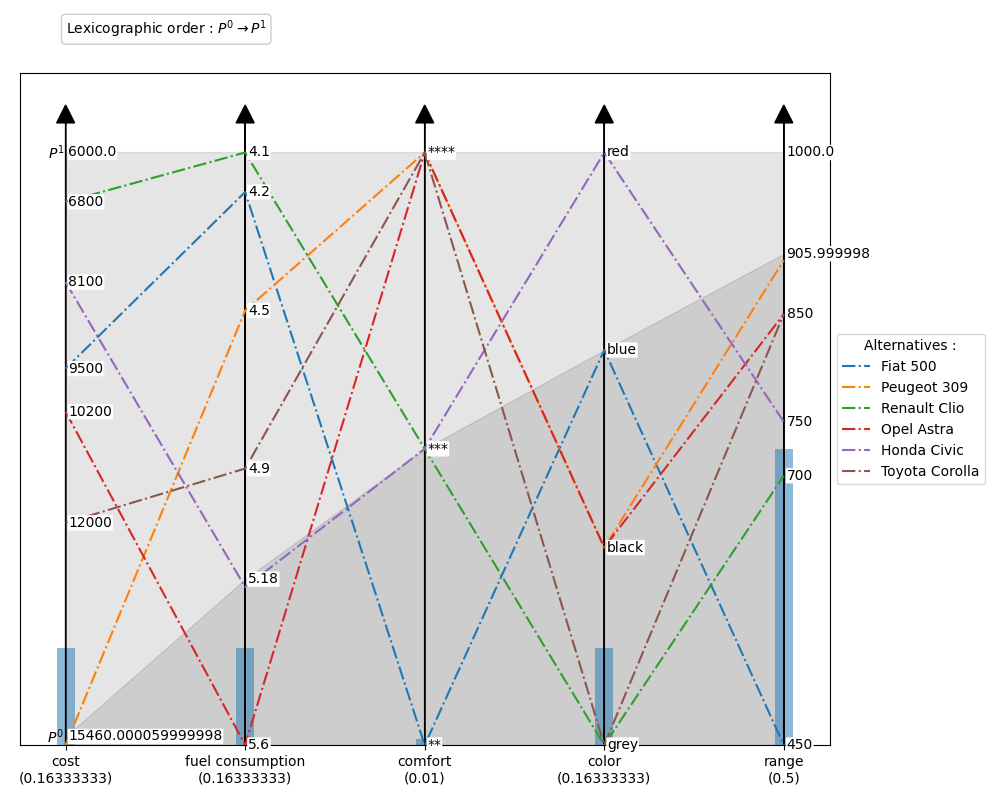

In [18]:
srmp.plot_input_data(
    performance_table,
    scales,
    **parameters,
    xticklabels_tilted=False,
    annotations=True,
    scales_boundaries=False,
    annotations_alpha=1,
    figsize=(10, 8),
)

#### Concordance index

<IPython.core.display.Javascript object>


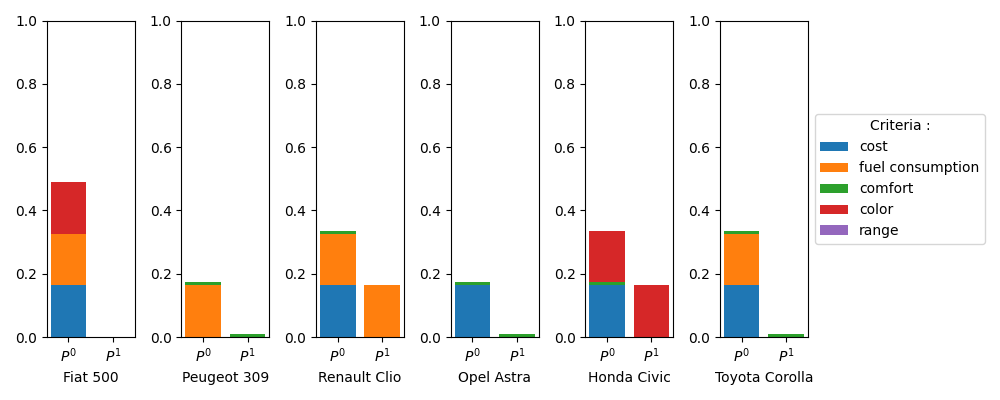

In [19]:
srmp.plot_concordance_index(
    performance_table,
    scales,
    **parameters,
    figsize=(10, 4),
    nrows=1,
    xlabels_tilted=False,
)

#### Ranking

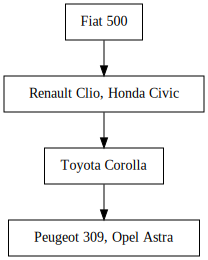

In [20]:
plot_linear_ranking(srmp.srmp(performance_table, scales, **parameters))

<IPython.core.display.Javascript object>


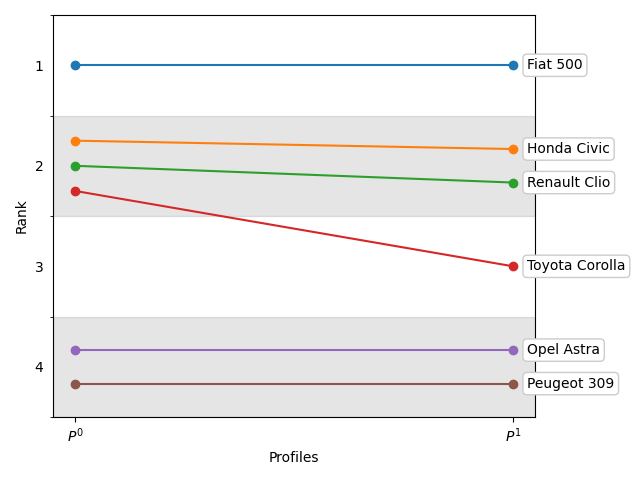

In [21]:
srmp.plot_progressive_ranking(
    performance_table,
    scales,
    **parameters,
)